# Counting words and punctuation

Based on the following site:
    https://www.kaggle.com/poloniki/nltk-book-summary-natural-language-processing/data

In [21]:
import matplotlib.pyplot as plt

In [10]:
import io
import hazm
filename = 'divan.txt'
file = io.open(filename, encoding='utf-8', errors='ignore')
matn = file.read()
file.close()

In [11]:
words = hazm.word_tokenize(matn)
print(words[:10])

['\ufeff', 'ديوان', 'حافظ', 'غزل', '۱', 'الا', 'يا', 'ايها', 'الساقی', 'ادر']


In [17]:
import nltk
from nltk.probability import FreqDist
text = nltk.Text(words)
print(text[:10])

['\ufeff', 'ديوان', 'حافظ', 'غزل', '۱', 'الا', 'يا', 'ايها', 'الساقی', 'ادر']


In [18]:
# getting lenght of the text in words and punctuation symbols
print('Words + punctuation:', len(text))

# getting all the distinc words in text
set(text)

# we can also combine them and see how many distinct words are exactly there 
distinct_words = len(set(text))
print('Distinc words and punctuation symbols:', distinct_words)

# based on that we can determine how 'Rich' is the text
rich = len(set(text)) / len(text)
print('My book is rich ratio is', rich)

# what part of the text takes specific word in percents?
text.count("من")
word_percent = 100 * text.count('من') / len(text)
print('Authors talks about himselft', word_percent, 'percent of time!' )

# This will help to get the most repetetive words and their count
fdist = FreqDist(text)
print(fdist.most_common(5))

Words + punctuation: 63668
Distinc words and punctuation symbols: 8950
My book is rich ratio is 0.14057297229377394
Authors talks about himselft 0.969089652572721 percent of time!
[('که', 2430), ('و', 2217), ('به', 1799), ('از', 1429), ('در', 1244)]


# Word frequency plotting

Visualization is always important =) 
* **fdist.plot** - plots the most repetetive words and punctuation marks by their count
* **dispersion_plot** - shows where does text have particular word in the begging or in the end.. And how often authors uses it.

In [19]:
print(text[:100])

['\ufeff', 'ديوان', 'حافظ', 'غزل', '۱', 'الا', 'يا', 'ايها', 'الساقی', 'ادر', 'کاسا', 'و', 'ناولها', 'که', 'عشق', 'آسان', 'نمود', 'اول', 'ولی', 'افتاد', 'مشکل\u200cها', 'به', 'بوی', 'نافه\u200cای', 'کاخر', 'صبا', 'زان', 'طره', 'بگشايد', 'ز', 'تاب', 'جعد', 'مشکينش', 'چه', 'خون', 'افتاد', 'در', 'دل\u200cها', 'مرا', 'در', 'منزل', 'جانان', 'چه', 'امن', 'عيش', 'چون', 'هر', 'دم', 'جرس', 'فرياد', 'می\u200cدارد', 'که', 'بربنديد', 'محمل\u200cها', 'به', 'می', 'سجاده', 'رنگين', 'کن', 'گرت', 'پير', 'مغان', 'گويد', 'که', 'سالک', 'بی\u200cخبر', 'نبود', 'ز', 'راه', 'و', 'رسم', 'منزل\u200cها', 'شب', 'تاريک', 'و', 'بيم', 'موج', 'و', 'گردابی', 'چنين', 'هايل', 'کجا', 'دانند', 'حال', 'ما', 'سبکباران', 'ساحل\u200cها', 'همه', 'کارم', 'ز', 'خود', 'کامی', 'به', 'بدنامی', 'کشيد', 'آخر', 'نهان', 'کی', 'ماند', 'آن']


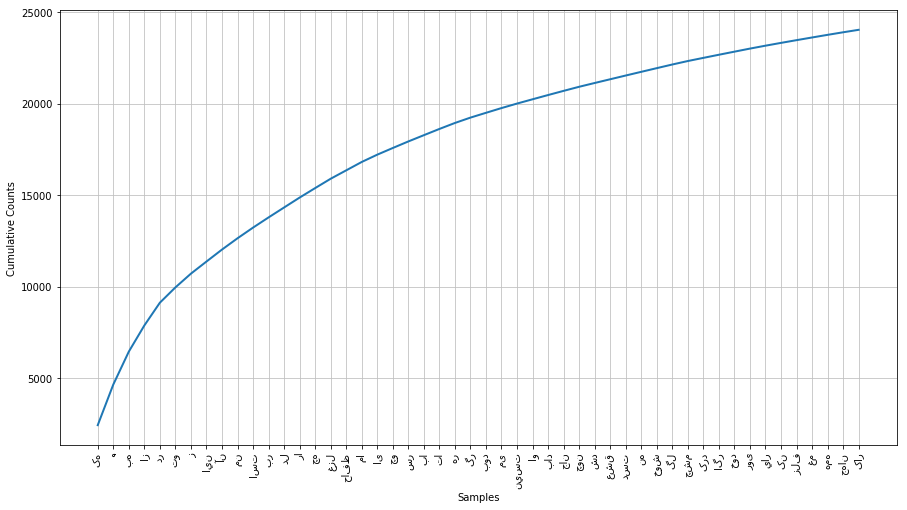

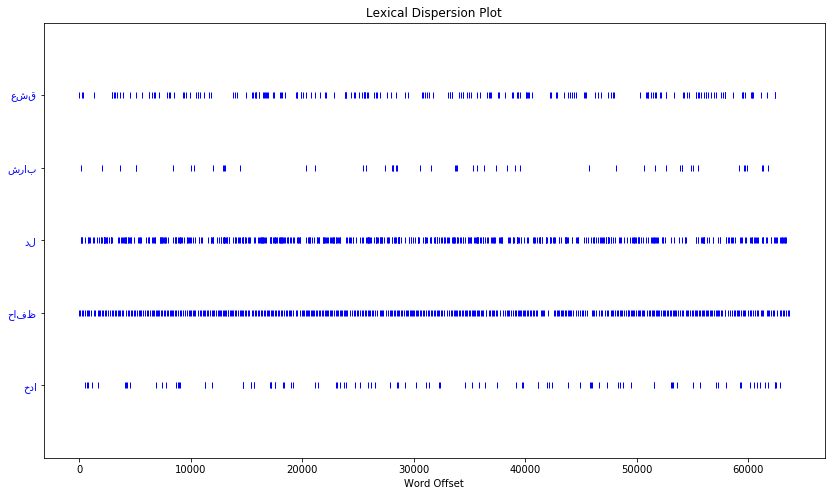

In [26]:
# Now while those words do not make much sense, we should determine which ones are just common words for every text
plt.figure(figsize=(15 , 8))
fdist.plot(50, cumulative=True)

# This plot basically shows word position in the text. We can see here that the word "please" was used only once at the end of the text.
plt.figure(figsize=(14 , 8))
text.dispersion_plot(["عشق", "شراب", "دل", "حافظ", "خدا"])

# How can we understand what text is about

As I understand there different way to get the meaning of the text. Frequent words do not tell much of the story. We  can also look at  words that do not repeat - **hapaxes**. That will be a little better, but still would not make too much sense. We can also subset list by getting out longest words with some frequence. That also gives some more information.

But In order to succeed we need to combine both methods, that will give much clearer picture of the text. We need to get the most repeated **bigrams** - two consecutive words in a text.

In [24]:
# getting all words that do not repeat itself
hapaxes = fdist.hapaxes()
print('Unique words:')
print(hapaxes[:8])
# getting combined
combined = sorted(w for w in set(text) if len(w) > 7 and fdist[w] > 7)
print('--------------------------------------------')
print('Counting words that are longer than 7 symbols and are repeated at least 7 times:')
print(combined[:10])
#lets get the collocation
print('--------------------------------------------')
print('Two consecutive words (bigrams) that get repeated most of the times:')
text.collocations()


Unique words:
['\ufeff', '۱', 'الساقی', 'ادر', 'ناولها', 'مشکل\u200cها', 'کاخر', 'مشکينش']
--------------------------------------------
Counting words that are longer than 7 symbols and are repeated at least 7 times:
['آمده\u200cايم', 'افتاده_بود', 'خواهد_بود', 'خواهد_بودن', 'خواهد_شد', 'خواهم_کرد', 'می\u200cفرستمت', 'نخواهد_شد', 'نخواهد_ماند', 'نمی\u200cارزد']
--------------------------------------------
Two consecutive words (bigrams) that get repeated most of the times:
پير مغان; دريغ مدار; ياد باد; باد صبا; درويشان است; نتوان کرد; توانی
کرد; غنيمت دان; خون جگر; اين همه; حيرت آمد; ياد آريد; رقص کنان; نيک
نامی; بيار باده; دير مغان; نگه دارد; کلبه احزان; خود باشم; مشک ختن


* **concordance** - shows context of concrete word in the text. 
* **similar** - shows what other words appear in a similar contexts. With that we can understand how particular author feels about certain word. From the example below we can see that author uses 'love' in the same context with 'whales', 'sea', 'ships', which can tell us what author likes the most.
* **common_contexts** - same as concordance, but shows mathcing contexts of several words.

In [25]:
# Thats how we can find any particular word
concordance = text.concordance("شراب")
print(concordance)
print('--------------------------------------------')
text.similar("دل")
print('and')
text.similar("دلبر")
print('--------------------------------------------')
# Now. Thats the list of words which were used in there same context as 'think'! That is actually very interesting.
text.common_contexts(["دل", "لب"])

Displaying 25 of 25 matches:
ه بگرفت و خرقه سالوس کجاست دير مغان و شراب ناب کجا چه نسبت است به رندی صلاح و تق
رد فريب چشم تو صد فتنه در جهان انداخت شراب خورده و خوی کرده می‌روی به چمن که آب 
 نرست غزل ۲۹ ما را ز خيال تو چه پروای شراب است خم گو سر خود گير که خمخانه خراب ا
ز شير مادر است چون نقش غم ز دور ببينی شراب خواه تشخيص کرده‌ايم و مداوا مقرر است 
م نامکرر است دی وعده داد وصلم و در سر شراب داشت امروز تا چه گويد و بازش چه در سر
يست معنی عفو و رحمت آمرزگار چيست زاهد شراب کوثر و حافظ پياله خواست تا در ميانه خ
نيست غلام نرگس جماش آن سهی سروم که از شراب غرورش به کس نگاهی نيست مباش در پی آزا
ون که می‌دمد از بوستان نسيم بهشت من و شراب فرح بخش و يار حورسرشت گدا چرا نزند لا
ر پای دم به دم گهر از ديده بارمت حافظ شراب و شاهد و رندی نه وضع توست فی الجمله م
و آزاد اگر بيند قد دلجوی فرخ بده ساقی شراب ارغوانی به ياد نرگس جادوی فرخ دوتا شد
ی پير می فروش که ذکرش به خير باد گفتا شراب نوش و غم دل ببر ز ياد گفتم به باد می‌
وته کنيم قصه که عمرت دراز باد غزل ۱۰۱ شراب و عيش نهان چيست کار بی‌بنياد زديم بر 

Now we can more o less tell smth about what text is about.

# Main Corpus Functionality
* **fileids**()	the files of the corpus
* ** fileids([categories])**	the files of the corpus corresponding to these categories
* **categories()**	the categories of the corpus
* **categories([fileids])	**the categories of the corpus corresponding to these files
* **raw()	**the raw content of the corpus
* **raw(fileids=[f1,f2,f3])**	the raw content of the specified files
* **raw(categories=[c1,c2])**	the raw content of the specified categories
* **words()**	the words of the whole corpus
* **words(fileids=[f1,f2,f3])**	the words of the specified fileids
* **words(categories=[c1,c2])**	the words of the specified categories
* **sents()**	the sentences of the whole corpus
* **sents(fileids=[f1,f2,f3])**	the sentences of the specified fileids
* ** sents(categories=[c1,c2])**	the sentences of the specified categories
* **abspath(fileid)**	the location of the given file on disk
* **encoding(fileid)**	the encoding of the file (if known)
* ** open(fileid)	**open a stream for reading the given corpus file
* **root**	if the path to the root of locally installed corpus
* **readme()**	the contents of the README file of the corpus